In [126]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/song-popularity/dataset.csv


In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

In [134]:
data = pd.read_csv('/kaggle/input/song-popularity/dataset.csv')

In [135]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Удаляем столбцы "Unnamed: 0", "track_id", "track_name", поскольку в данном контексте они бесполезны

In [137]:
data = data.drop(columns=["Unnamed: 0", "track_id", "track_name"])

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   popularity        114000 non-null  int64  
 3   duration_ms       114000 non-null  int64  
 4   explicit          114000 non-null  bool   
 5   danceability      114000 non-null  float64
 6   energy            114000 non-null  float64
 7   key               114000 non-null  int64  
 8   loudness          114000 non-null  float64
 9   mode              114000 non-null  int64  
 10  speechiness       114000 non-null  float64
 11  acousticness      114000 non-null  float64
 12  instrumentalness  114000 non-null  float64
 13  liveness          114000 non-null  float64
 14  valence           114000 non-null  float64
 15  tempo             114000 non-null  float64
 16  time_signature    11

Очищаем датасет от пустых значений

In [139]:
data.isnull().sum()

artists             1
album_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [140]:
data = data.dropna()

In [141]:
data.isnull().sum()

artists             0
album_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [142]:
data.shape

(113999, 18)

Мы создаем гистограмму, чтобы проанализировать распределение популярности треков в датасете. Этот график помогает выявить, какие значения популярности встречаются чаще всего, существуют ли выраженные пики, а также оценить степень сбалансированности данных.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


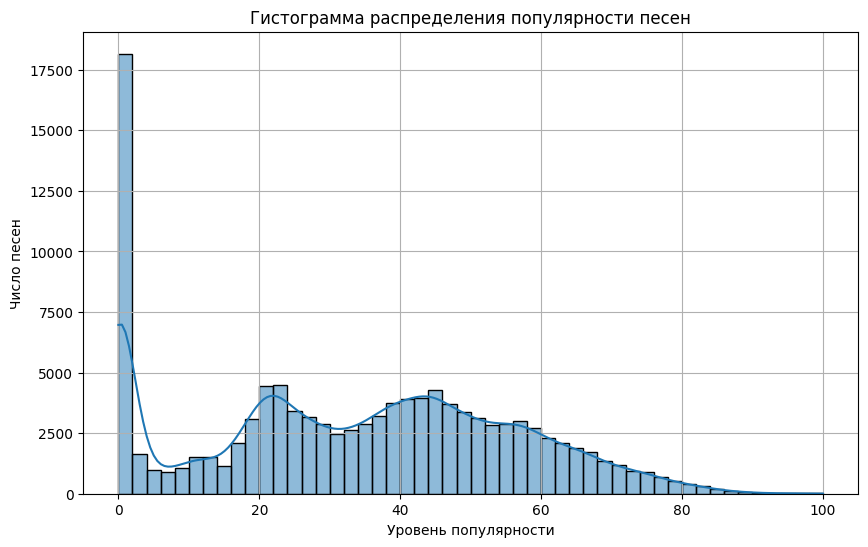

In [143]:
plt.figure(figsize=(10, 6))

sns.histplot(data['popularity'], bins=50, kde=True)

plt.title('Гистограмма распределения популярности песен')
plt.xlabel('Уровень популярности')
plt.ylabel('Число песен')

plt.grid(True)
plt.show()

График показывает, что большинство треков сосредоточено в диапазоне низкой и средней популярности, тогда как высокие значения встречаются редко. Это указывает на то, что треки с высокой популярностью являются скорее исключением, чем правилом.

Далее создается столбчатая диаграмма средней популярности треков в каждом из жанров. Для этого данные предварительно группируются по жанрам, а затем для каждой группы вычисляется среднее значение.

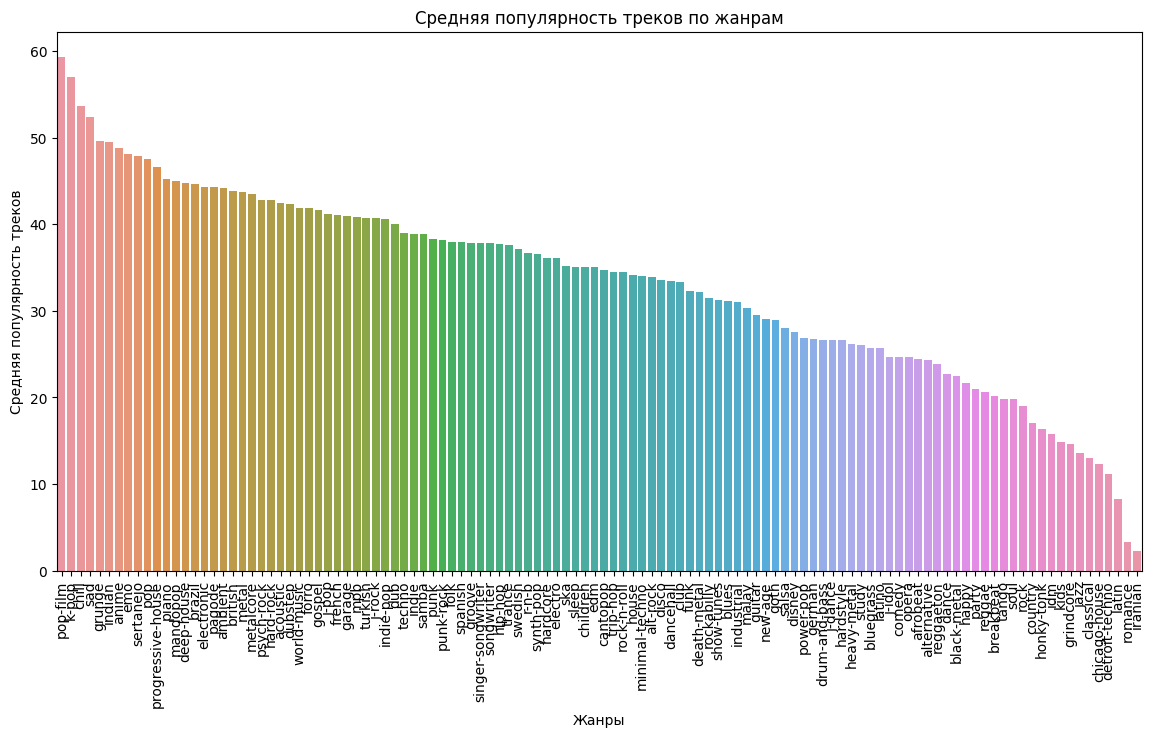

In [144]:
plt.figure(figsize=(14, 7))

avg_genre_popularity = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

sns.barplot(x=avg_genre_popularity.index, y=avg_genre_popularity.values)

plt.title('Средняя популярность треков по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Средняя популярность треков')

plt.xticks(rotation=90)

plt.show()

На данном графике представлена средняя популярность треков по жанрам. Мы видим, что некоторые жанры, такие как поп, рок и хип-хоп, имеют значительно более высокие значения популярности по сравнению с менее популярными жанрами, такими как минимал, industrial или experimental. Это свидетельствует о явных предпочтениях аудитории к определённым музыкальным направлениям.

Далее строим графики, чтобы изучить корреляции между признаками:

danceability - popularity

In [145]:
plt.figure(figsize=(10, 6))

sns.kdeplot(x=data['danceability'], y=data['popularity'], cmap="viridis", fill=True)

plt.title("Плотность зависимости популярности от танцевальности трека")
plt.xlabel("Танцевальность")
plt.ylabel("Популярность")
plt.show()

ValueError: too many values to unpack (expected 2)

/tmp/ipykernel_24/689886873.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_popularity_by_danceability = data.groupby('danceability_groups')['popularity'].mean()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


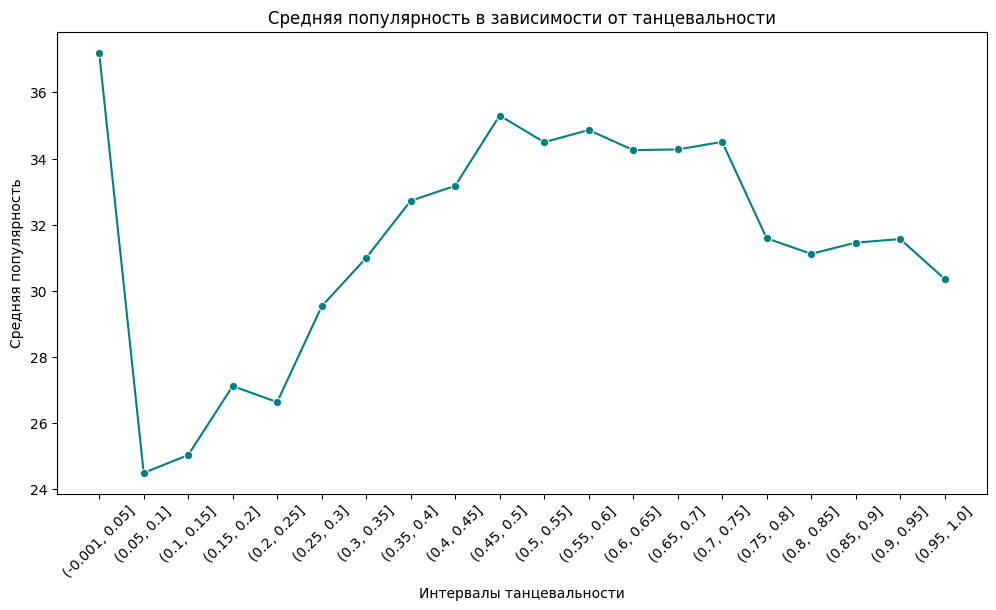

In [77]:
danceability_intervals = np.linspace(0, 1, 21)

data['danceability_groups'] = pd.cut(data['danceability'], bins=danceability_intervals, include_lowest=True)

avg_popularity_by_danceability = data.groupby('danceability_groups')['popularity'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_popularity_by_danceability.index.astype(str), y=avg_popularity_by_danceability.values, marker="o", color="teal")
plt.title("Средняя популярность в зависимости от танцевальности")
plt.xlabel("Интервалы танцевальности")
plt.ylabel("Средняя популярность")
plt.xticks(rotation=45)
plt.show()

График показывает, что большая часть треков имеет танцевальность в пределах от 0.5 до 0.8. Популярность, в свою очередь, растет с увеличением танцевальности, достигая максимального значения в диапазоне 0.45-0.55. Однако после этого, начиная с танцевальности около 0.55-0.6, наблюдается плавное снижение популярности. Если разделить треки на категории, то наиболее популярными являются те, у которых танцевальность находится в пределах от 0.4 до 0.6, в то время как треки с низким уровнем танцевальности (от 0.0 до 0.3) скорее всего будут востребованы в узких жанрах или среди специфических групп слушателей. Треки с танцевальностью выше 0.7, несмотря на свою популярность на танцполах, скорее всего, не смогут достичь широкого успеха.

valence - popularity


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='valence', ylabel='popularity'>

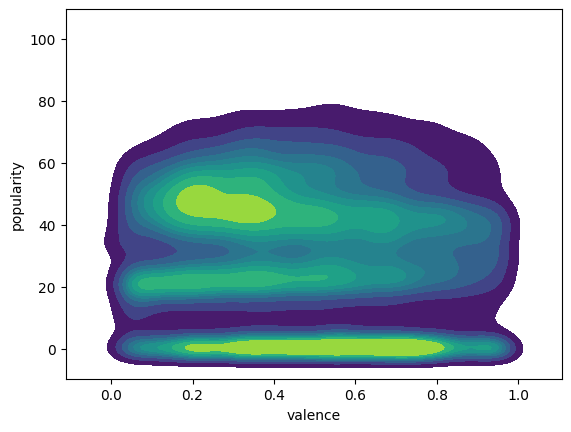

In [146]:
plt.figure(figsize=(10, 6))

sns.kdeplot(x=data['valence'], y=data['popularity'], cmap="viridis", fill=True)

plt.title("Плотность зависимости популярности от валентности трека")
plt.xlabel("Популярность")
plt.ylabel("Валентность")
plt.show()

График показывает, что зависимость между популярностью треков и их валентностью (эмоциональной окраской) не имеет явной структуры. Популярность треков распределена по всему диапазону валентности, что свидетельствует о том, что валентность не является сильным фактором, определяющим популярность. То есть, треки с разной эмоциональной окраской могут быть как высоко, так и низко популярными.

tempo - popularity

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


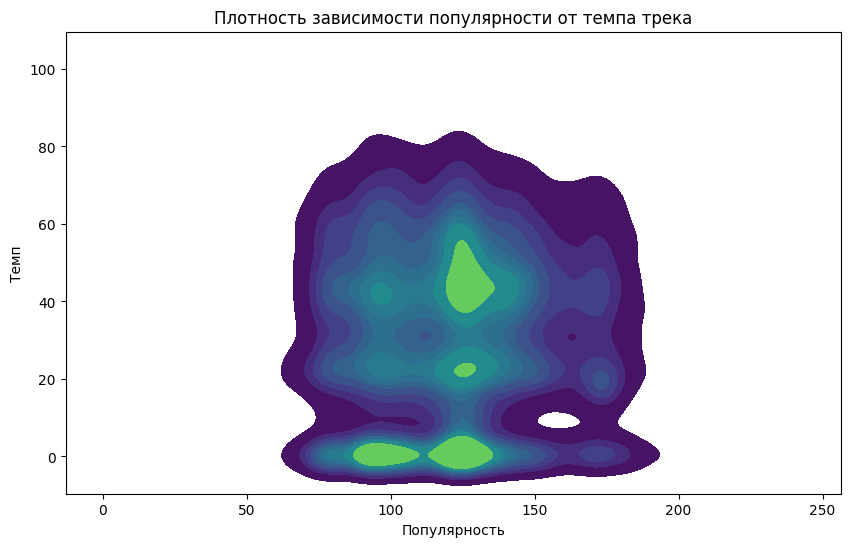

In [147]:
plt.figure(figsize=(10, 6))

sns.kdeplot(x=data['tempo'], y=data['popularity'], cmap="viridis", fill=True)

plt.title("Плотность зависимости популярности от темпа трека")
plt.xlabel("Популярность")
plt.ylabel("Темп")
plt.show()

Этот график показывает небольшую корреляцию между признаками tempo и popularity. Наиболее популярны треки со средним темпом.

energy - popularity

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


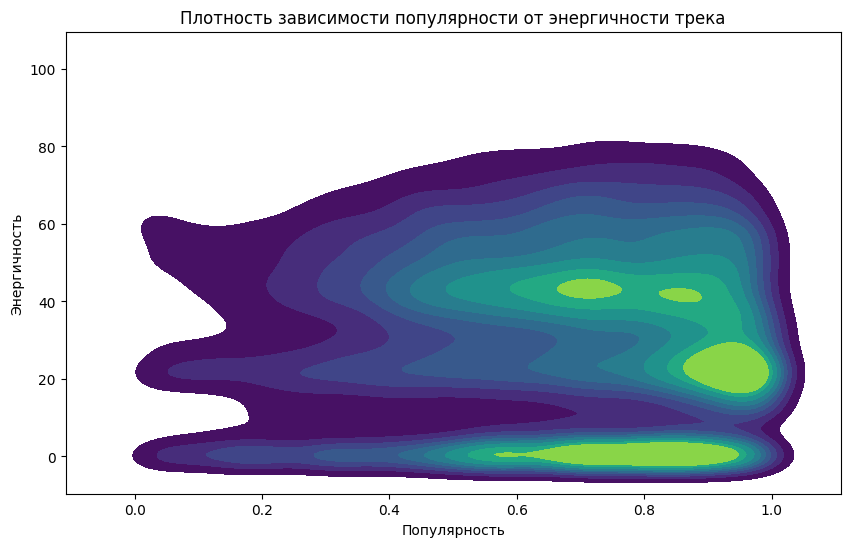

In [84]:
plt.figure(figsize=(10, 6))

sns.kdeplot(x=data['energy'], y=data['popularity'], cmap="viridis", fill=True)

plt.title("Плотность зависимости популярности от энергичности трека")
plt.xlabel("Популярность")
plt.ylabel("Энергичность")
plt.show()

/tmp/ipykernel_24/426595164.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_popularity_by_energy = data.groupby('energy_groups')['popularity'].mean()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


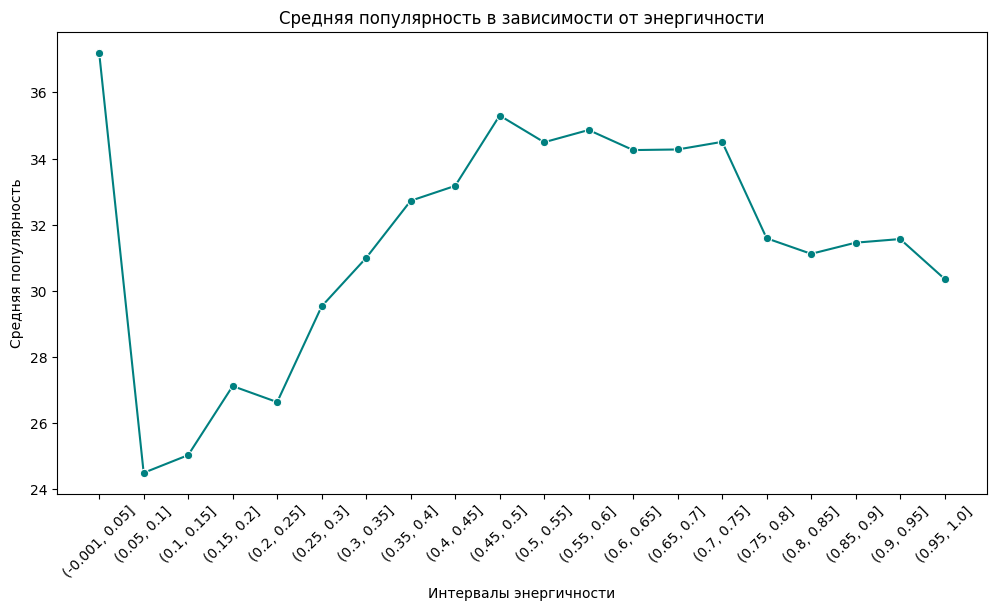

In [148]:
enegry_intervals = np.linspace(0, 1, 21)

data['energy_groups'] = pd.cut(data['energy'], bins=enegry_intervals, include_lowest=True)

avg_popularity_by_energy = data.groupby('energy_groups')['popularity'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_popularity_by_danceability.index.astype(str), y=avg_popularity_by_danceability.values, marker="o", color="teal")
plt.title("Средняя популярность в зависимости от энергичности")
plt.xlabel("Интервалы энергичности")
plt.ylabel("Средняя популярность")
plt.xticks(rotation=45)
plt.show()


Большее количество треков характеризуется энергичностью в пределах от 0.6 до 1. Популярность треков возрастает с увеличением энергичности, достигая пика в интервале от 0.45 до 0.55. После этого, начиная с уровня энергичности около 0.65-0.7, популярность начинает постепенно снижаться. Исходя из этих данных, можно выделить несколько типов треков: наиболее популярными являются те, у которых энергичность варьируется от 0.4 до 0.8. Треки с низким уровнем энергичности (от 0.0 до 0.3) могут быть востребованы в нишевых жанрах или среди специализированных слушателей. В то время как треки с высокой энергичностью (от 0.8 до 1.0) идеально подходят для танцевальных мероприятий, но их успех ограничен в более широких аудиториях.

explicit - popularity

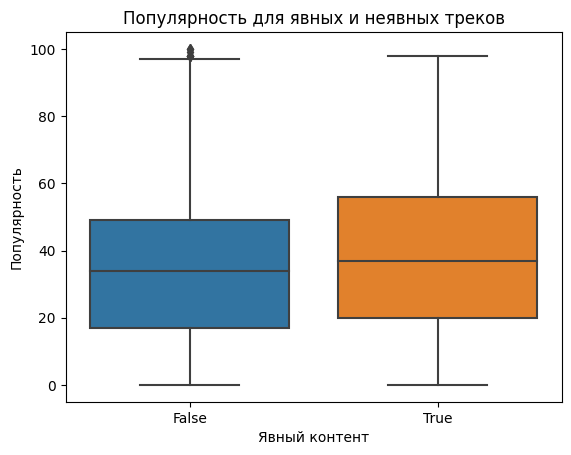

In [149]:
sns.boxplot(x=data['explicit'], y=data['popularity'])
plt.title('Популярность для явных и неявных треков')
plt.xlabel('Явный контент')
plt.ylabel('Популярность')
plt.show()

Популярность треков с нецензурной лексикой действительно немного выше, что может указывать на предпочтение слушателей к более откровенному или нецензурному контенту. Однако, разница в популярности между треками с явным и неявным контентом относительно небольшая, что говорит о том, что наличие нецензурной лексики не является решающим фактором для популярности треков. Это подтверждает, что существует множество других факторов, влияющих на популярность музыки, помимо наличия нецензурных выражений.

In [150]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

Строим корреляционную тепловую карту, для того, чтобы оценить, какие признаки наиболее сильно коррелириуют с популярностью

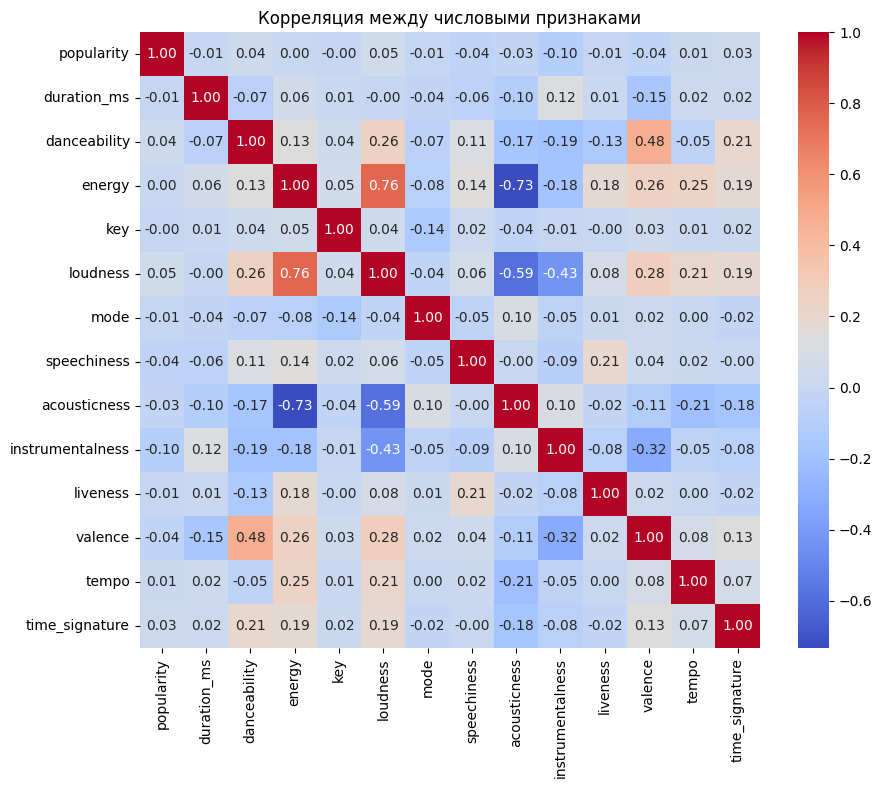

In [151]:
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляция между числовыми признаками')
plt.show()

В целом, в данных не так много признаков, которые бы имели выраженную линейную корреляцию друг с другом. Например, наблюдается зависимость между loudness и energy, это вполне логично, поскольку громкость и энергия трека часто связаны — более громкие треки, как правило, имеют более высокую энергию. Также наблюдается отрицательная корреляция между acousticness и energy. Чем более "акустичен" трек, тем он менее энергичен. Это также довольно очевидно, так как акустические треки часто характеризуются меньшей интенсивностью и динамичностью.
При этом ни один из признаков не показывает значимой линейной корреляции с популярностью. Это предполагает, что зависимости в данных, скорее всего, являются нелинейными.

Добавление новых признаков 

Добавим новый признак категории танцевальности - 'minimal' от 0 до 0.4, 'normal' от 0.4 до 0.7, 'high' от 0.7 до 1

In [152]:
data['danceability_category'] = pd.cut(data['danceability'], bins=[0, 0.4, 0.7, 1], labels=['minimal', 'normal', 'high'])

Добавим новый признак категории энергичности - 'minimal' от 0 до 0.4, 'normal' от 0.4 до 0.7, 'high' от 0.7 до 1

In [153]:
data['energy_category'] = pd.cut(data['energy'], bins=[0, 0.4, 0.8, 1], labels=['minimal', 'normal', 'high'])

Добавим новый признак отношения danceability к energy

In [154]:
epsilon = 1e-9  # константа для предотвращения деления на ноль

data['danceability_to_energy'] = data['danceability'] / (data['energy'] + epsilon)


Добавим новый признак отношения loudness к energy

In [155]:
data['loudness_to_energy'] = data['loudness'] / (data['energy'] + epsilon)


Добавим новый признак - танцевальная насыщенность для оценки танцевального потенциала

In [156]:
data['dance_potential'] = data['danceability'] * data['energy'] * data['valence']


In [157]:
data

,artists,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,valence,tempo,time_signature,track_genre,energy_groups,danceability_category,energy_category,danceability_to_energy,loudness_to_energy,dance_potential
0,Gen Hoshino,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,...,0.7150,87.917,4,acoustic,"(0.45, 0.5]",normal,normal,1.466377,-14.633406,0.222820
1,Ben Woodward,Ghost (Acoustic),55,149610,False,0.420,0.1660,1,-17.235,1,...,0.2670,77.489,4,acoustic,"(0.15, 0.2]",normal,minimal,2.530120,-103.825301,0.018615
2,Ingrid Michaelson;ZAYN,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,...,0.1200,76.332,4,acoustic,"(0.35, 0.4]",normal,minimal,1.220056,-27.114206,0.018869
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,71,201933,False,0.266,0.0596,0,-18.515,1,...,0.1430,181.740,3,acoustic,"(0.05, 0.1]",minimal,minimal,4.463087,-310.654357,0.002267
4,Chord Overstreet,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,...,0.1670,119.949,4,acoustic,"(0.4, 0.45]",normal,normal,1.395034,-21.853273,0.045720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,21,384999,False,0.172,0.2350,5,-16.393,1,...,0.0339,125.995,5,world-music,"(0.2, 0.25]",minimal,minimal,0.731915,-69.757447,0.001370
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,22,385000,False,0.174,0.1170,0,-18.318,0,...,0.0350,85.239,4,world-music,"(0.1, 0.15]",minimal,minimal,1.487179,-156.564101,0.000713
113997,Cesária Evora,Best Of,22,271466,False,0.629,0.3290,0,-10.895,0,...,0.7430,132.378,4,world-music,"(0.3, 0.35]",normal,minimal,1.911854,-33.115501,0.153757
113998,Michael W. Smith,Change Your World,41,283893,False,0.587,0.5060,7,-10.889,1,...,0.4130,135.960,4,world-music,"(0.5, 0.55]",normal,normal,1.160079,-21.519763,0.122670


Исправляем категориальные признаки

In [158]:
numerical_features = data.select_dtypes(include=['number', 'float64', 'int64']).columns.tolist()

categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

In [159]:
categorical_features

['artists',
 'album_name',
 'track_genre',
 'energy_groups',
 'danceability_category',
 'energy_category']

In [160]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_features:

    le = LabelEncoder()

    data[col] = le.fit_transform(data[col])

In [161]:
data


,artists,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,valence,tempo,time_signature,track_genre,energy_groups,danceability_category,energy_category,danceability_to_energy,loudness_to_energy,dance_potential
0,10357,8100,73,230666,False,0.676,0.4610,1,-6.746,0,...,0.7150,87.917,4,0,9,2,2,1.466377,-14.633406,0.222820
1,3287,14796,55,149610,False,0.420,0.1660,1,-17.235,1,...,0.2670,77.489,4,0,3,2,1,2.530120,-103.825301,0.018615
2,12397,39162,57,210826,False,0.438,0.3590,0,-9.734,1,...,0.1200,76.332,4,0,7,2,1,1.220056,-27.114206,0.018869
3,14839,8580,71,201933,False,0.266,0.0596,0,-18.515,1,...,0.1430,181.740,3,0,1,1,1,4.463087,-310.654357,0.002267
4,5255,16899,82,198853,False,0.618,0.4430,2,-9.681,1,...,0.1670,119.949,4,0,8,2,2,1.395034,-21.853273,0.045720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22486,66,21,384999,False,0.172,0.2350,5,-16.393,1,...,0.0339,125.995,5,113,4,1,1,0.731915,-69.757447,0.001370
113996,22486,66,22,385000,False,0.174,0.1170,0,-18.318,0,...,0.0350,85.239,4,113,2,1,1,1.487179,-156.564101,0.000713
113997,4952,5028,22,271466,False,0.629,0.3290,0,-10.895,0,...,0.7430,132.378,4,113,6,2,1,1.911854,-33.115501,0.153757
113998,18534,7238,41,283893,False,0.587,0.5060,7,-10.889,1,...,0.4130,135.960,4,113,10,2,2,1.160079,-21.519763,0.122670


Экспериментируем с моделями

Создаем обучающие и тестовые выборки

In [164]:
X = data.drop(columns=['popularity'])

y = data['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Нормализуем данные

In [165]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

№1 Линейная модель

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

linear_model = LinearRegression()

y_pred = cross_val_predict(linear_model, X_train, y_train, cv=5)

abs_error = mean_absolute_error(y_train, y_pred)
sq_error = mean_squared_error(y_train, y_pred)
root_sq_error = sq_error ** 0.5
r_squared = r2_score(y_train, y_pred)

print('Линейная модель:')
print('MAE: ', abs_error)
print('MSE: ', sq_error)
print('RMSE: ', root_sq_error)
print('R2: ', r_squared)

Линейная модель:
MAE:  19.350061093974826
MSE:  111053.20740243967
RMSE:  333.2464664515434
R2:  -222.06860368710804


MAE ~19 является приемлемым значением. Большие значения MSE и RMSE могут быть признаком того, что модель плохо справляется с предсказанием данных. Большое отрицательное значение R^2 означает, что модель линейной регрессии хуже, чем простое среднее значение целевой переменной как предсказание для всех данных. Это указывает на то, что модель совсем не подходит для данных в текущей форме

№2 Дерево решений

In [170]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)

y_pred = cross_val_predict(tree_model, X_train, y_train, cv=5)

abs_error = mean_absolute_error(y_train, y_pred)
sq_error = mean_squared_error(y_train, y_pred)
root_sq_error = sq_error ** 0.5
r_squared = r2_score(y_train, y_pred)

print('Дерево решений:')
print('MAE: ', abs_error)
print('MSE: ', sq_error)
print('RMSE: ', root_sq_error)
print('R2: ', r_squared)

Дерево решений:
MAE:  13.71550674897751
MSE:  466.673127812074
RMSE:  21.60261854063238
R2:  0.06261038799093954


DecisionTreeRegressor продемонстрировал улучшенные результаты по сравнению с линейной регрессией, особенно в снижении ошибок (MAE, RMSE). Тем не менее, значение R^2 низкое, что указывает на ограниченную способность модели объяснить зависимости в данных.

№3 Градиентный бустинг

In [174]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)

y_pred = cross_val_predict(xgb_model, X_train, y_train, cv=5)

abs_error = mean_absolute_error(y_train, y_pred)
sq_error = mean_squared_error(y_train, y_pred)
root_sq_error = sq_error ** 0.5
r_squared = r2_score(y_train, y_pred)

print('Модель XGBoost:')
print('MAE: ', abs_error)
print('MSE: ', sq_error)
print('RMSE: ', root_sq_error)
print('R2: ', r_squared)


Модель XGBoost:
MAE:  13.459864099055107
MSE:  305.8918812447521
RMSE:  17.48976504258282
R2:  0.38556592443821214


Модель XGBoost показала лучший результат среди рассмотренных алгоритмов, продемонстрировав более низкие значения ошибок (MAE, MSE, RMSE) и более высокую объяснительную способность (R^2). Это указывает на ее высокую эффективность в задаче предсказания

№4 Нейронная сеть

In [185]:
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

nueral_network = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],),
                      kernel_regularizer=regularizers.l2(0.2)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.2)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1)
])

nueral_network.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-6)

train_history = nueral_network.fit(
    X_train, 
    y_train, 
    epochs=20, 
    batch_size=32, 
    verbose=1,
    validation_split=0.2,
    validation_data=(X_train, y_train), 
    callbacks=[early_stop, lr_scheduler]
)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2850/2850 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 772.7701 - mae: 22.2239 - val_loss: 489.9843 - val_mae: 18.1393 - learning_rate: 0.0010
Epoch 2/20
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 556.4272 - mae: 19.2274 - val_loss: 484.2662 - val_mae: 18.0919 - learning_rate: 0.0010
Epoch 3/20
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 538.7108 - mae: 18.9749 - val_loss: 485.5005 - val_mae: 18.2070 - learning_rate: 0.0010
Epoch 4/20
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 529.2949 - mae: 18.8864 - val_loss: 478.9652 - val_mae: 18.0596 - learning_rate: 0.0010
Epoch 5/20
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 520.5891 - mae: 18.7457 - val_loss: 479.7994 - val_mae: 18.1558 - learning_rate: 0.0010
Epoch 6/20
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 515.2773 - mae: 18.6757 - val_loss: 477.4516 - val_mae: 18.1176 - learning_rate: 0.0010
Epoch 7/20
2850/2850 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 518.0590 - mae: 18.7477 - val_loss: 478.1630 - va

2850/2850 ━━━━━━━━━━━━━━━━━━━━ 3s 961us/step
Нейронная сеть:
Линейная модель:
MAE:  17.890002621803255
MSE:  465.83871258290014
RMSE:  21.583297073962083
R2:  0.06428644800235872


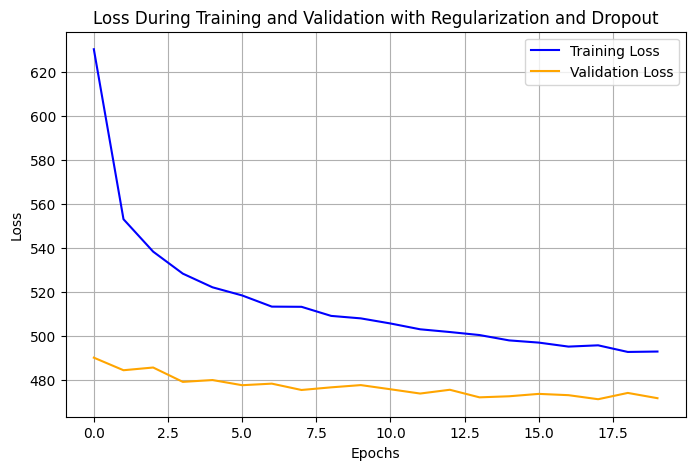

In [187]:
y_pred = nueral_network.predict(X_train).flatten()

print('Нейронная сеть:')
abs_error = mean_absolute_error(y_train, y_pred)
sq_error = mean_squared_error(y_train, y_pred)
root_sq_error = sq_error ** 0.5
r_squared = r2_score(y_train, y_pred)

print('Линейная модель:')
print('MAE: ', abs_error)
print('MSE: ', sq_error)
print('RMSE: ', root_sq_error)
print('R2: ', r_squared)

# Построение графика лосса
plt.figure(figsize=(8, 5))
plt.plot(train_history.history['loss'], label='Training Loss', color='blue')
plt.plot(train_history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss During Training and Validation with Regularization and Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

Результаты работы нейронной сети не показали значительного прогресса по сравнению с линейной регрессией и деревом решений. Хотя наблюдается небольшой рост R^2, высокие значения RMSE свидетельствуют о том, что модель требует доработки для улучшения точности предсказаний.

Оценка важности признаков для XGBoost

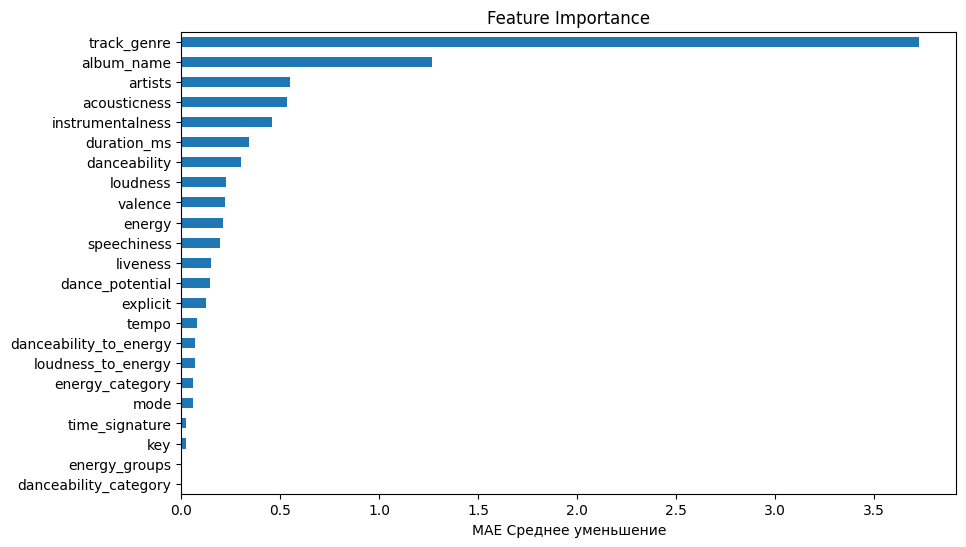

In [188]:
from sklearn.inspection import permutation_importance

xgb_model.fit(X_train, y_train)

feature_importance = permutation_importance(
    xgb_model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error'
)

importance_values = pd.Series(feature_importance.importances_mean, index=X.columns)

importance_values.sort_values().plot(kind='barh', figsize=(10, 6))

plt.title('Feature Importance')
plt.xlabel('MAE Среднее уменьшение')
plt.show()

На графике, представленном с использованием permutation importance, видно, что важность признаков для модели, предсказывающей популярность треков, значительно различается. Наибольшее влияние на модель оказывает признак track_genre, что указывает на то, что жанр трека имеет ключевое значение для предсказания его популярности. Это логично, так как жанр напрямую связан с предпочтениями слушателей.
Далее, признаки album_name и artists также играют важную роль, что также ожидаемо, поскольку название альбома и исполнитель могут сильно влиять на восприятие и популярность трека. Признак acousticness тоже имеет значительное значение, возможно, потому что акустическая составляющая трека может быть важным фактором для аудитории в определенных жанрах.
Другие важные признаки включают instrumentalness, duration_ms, и danceability, что также соответствует интуитивному ожиданию, что музыкальные характеристики и продолжительность трека влияют на его восприятие.
Признаки с низким влиянием, такие как key, energy_groups, и danceability_category, имеют значительно меньшее значение, что может свидетельствовать о том, что эти параметры играют меньшую роль при оценке популярности трека.

Вывод по работе:
Анализ показал, что популярность музыкальных треков во многом определяется не только такими характеристиками, как жанр и громкость, но и эмоциональными и вокальными особенностями композиций. На основе этих данных можно разрабатывать системы рекомендаций, которые будут лучше соответствовать вкусам пользователей, предлагая им более точные музыкальные предпочтения.
Тем не менее, прогнозирование успеха трека по-прежнему представляет собой сложную задачу. На популярность трека влияют многочисленные факторы, такие как социальные, культурные и случайные обстоятельства, которые невозможно полноценно учесть при анализе каждого трека. Это делает прогнозы в области популярности музыкальных произведений крайне нестабильными, несмотря на имеющиеся данные и модели.